In [1]:
import datetime
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import seed
from random import gauss

In [2]:
# funções auxiliares

from math import log10, floor

def round_it(x, sig):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)


# Tempo de queda da esfera

Expressão para o tempo de queda de uma altura de 1.5 m

In [3]:
g = 9.787899
h = 1.5
t = (2*h/g) **(0.5)
t

0.5536252478513619

Incerteza estimada

In [4]:
erro_h = 0.02
erro_t_prop = round_it(0.5*t*erro_h/h,1)
erro_t_crono = 0.01
erro_t_reacao = 2*0.25
erro_t_prop, erro_t_crono, erro_t_reacao

(0.004, 0.01, 0.5)

## Dados reais para o cálculo do desvio padrão 

In [5]:
tempos = pd.read_csv('tempos.csv')
tempos

,tempos
0,0.31
1,0.53
2,0.44
3,0.65
4,0.40
...,...
595,0.63
596,0.64
597,0.64
598,0.62


<Axes: ylabel='Count'>

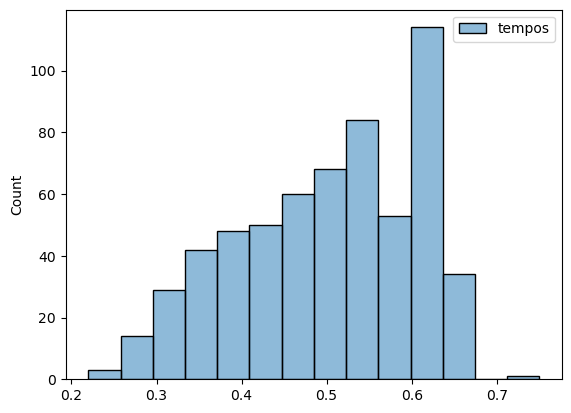

In [6]:
sns.histplot(tempos)

In [7]:
tempos.describe()

,tempos
count,600.000000
mean,0.503267
std,0.104925
min,0.220000
25%,0.430000
50%,0.520000
75%,0.590000
max,0.750000


In [8]:
desvio_padrao = tempos.std().item()
desvio_padrao

0.10492542333959805

## Simulação

In [9]:
N_conj = 6 # número de conjunto de dados
N_medidas = 10 # número de medidas de cada conjunto
medidas = pd.DataFrame()
for i in range(N_conj):
    medidas[str(i)] = [gauss(t,desvio_padrao) for i in range(N_medidas )]

medidas

,0,1,2,3,4,5
0,0.552225,0.548949,0.578115,0.458469,0.554432,0.672445
1,0.703897,0.412994,0.503206,0.397986,0.483226,0.393094
2,0.816597,0.437921,0.454526,0.683360,0.411969,0.622559
3,0.594025,0.668695,0.594660,0.467458,0.627145,0.726655
4,0.579336,0.595057,0.610327,0.578221,0.736646,0.747062
5,0.693740,0.577388,0.472133,0.565921,0.538716,0.552784
6,0.670685,0.345039,0.397908,0.580355,0.535048,0.669316
7,0.707940,0.443418,0.570540,0.575411,0.623449,0.789040
8,0.521321,0.384308,0.443191,0.761497,0.634183,0.650737
9,0.636502,0.529961,0.460497,0.483139,0.444546,0.536523


Dicionário de estatísticas (média, desvio padrão, incerteza da média)

In [11]:
estatistica = {'media':[], 'desvio':[], 'incerteza':[]}

In [12]:
media = pd.DataFrame()
for i in range(N_conj):
    media[str(i)] = [medidas[str(i)].mean()]

In [54]:
desvio = pd.DataFrame()
for i in range(N_conj):
    desvio[str(i)] = [medidas[str(i)].std()]

In [14]:
estatistica['media'] = media
estatistica['desvio'] = desvio
estatistica['incerteza'] = desvio/((N_medidas)**0.5)

In [15]:
estatistica

{'media':           0         1        2         3         4         5
 0  0.647627  0.494373  0.50851  0.555182  0.558936  0.636021,
 'desvio':           0         1         2         3         4         5
 0  0.088649  0.104607  0.074201  0.109359  0.098586  0.116731,
 'incerteza':           0        1         2         3         4         5
 0  0.028033  0.03308  0.023464  0.034582  0.031176  0.036913}

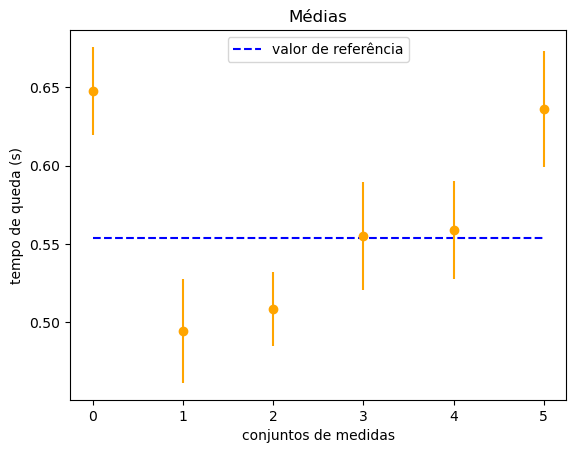

In [53]:
fig, ax = plt.subplots()

x = list(range(N_conj))

ax.plot(
    x,
    t*np.ones(6),
    color='blue',
    linestyle='dashed',
    label='valor de referência'
)
ax.errorbar(
    x,
    estatistica['media'].values[0],
    yerr = estatistica['incerteza'].values[0],
    color='orange',
    marker='o',
    linestyle='none',
    #label=''
)


ax.set_title('Médias')
ax.set_xlabel('conjuntos de medidas')
ax.set_ylabel('tempo de queda (s)')
ax.legend(loc='upper center', ncols=1)
